# **Sample Size Calculator**
The provided Python code calculates the required sample size for an A/B test based on the significance level (alpha), the power of the test, the baseline conversion rate (p1), and the minimum detectable effect (delta). It employs a normal distribution approach to determine how large each group in the test needs to be to statistically detect the specified effect with the desired confidence. This calculation ensures that the A/B test is adequately powered to identify meaningful differences between the two versions.

In [2]:
import scipy.stats as stats
import numpy as np

def calculate_sample_size(alpha, power, p1, delta, allocation_ratio=1):
    """
    Calculate the required sample size for an A/B test.

    Parameters:
    - alpha: Significance level (Type I error rate)
    - power: Power of the test (1 - Type II error rate)
    - p1: Baseline conversion rate
    - delta: Minimum detectable effect (as a proportion of p1)
    - allocation_ratio: The ratio of the size of group A to group B. Default is 1 (equal size).

    Returns:
    - The required sample size per group.
    """
    # Z-scores for the significance and power levels
    z_alpha = stats.norm.ppf(1 - alpha/2)
    z_power = stats.norm.ppf(power)

    # Pooled standard deviation
    p2 = p1 + delta
    pooled_sd = np.sqrt(p1 * (1 - p1) + p2 * (1 - p2) / allocation_ratio)

    # Calculate sample size
    sample_size = (z_alpha + z_power) ** 2 * pooled_sd ** 2 / delta ** 2
    return np.ceil(sample_size)

# Example parameters
alpha = 0.05  # Significance level
power = 0.8   # Power of the test
p1 = 0.1      # Baseline conversion rate
delta = 0.02  # Minimum detectable effect (MDE)
allocation_ratio = 1  # Equal allocation for A and B groups

# Calculate the required sample size per group
sample_size = calculate_sample_size(alpha, power, p1, delta, allocation_ratio)
print(f"Required sample size per group: {sample_size}")

Required sample size per group: 3839.0


# **Chi-Squared Test**

The Chi-Squared test is a statistical method used to determine the relationship between two categorical variables, examining if distributions differ across groups or if variables are independent. It involves analyzing frequency data within a contingency table, suitable for large sample sizes to ensure validity. Particularly useful for independence testing and assessing goodness-of-fit to theoretical distributions, it necessitates data independence and category exclusivity. This test is essential in fields requiring analysis of categorical relationships, provided its assumptions are satisfied.

In [3]:
import pandas as pd
from scipy.stats import chi2_contingency

# Sample data
df = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female'],
                   'Preference': ['Option A', 'Option A', 'Option B', 'Option B']})

# Create the contingency table
contingency_table = pd.crosstab(df['Gender'], df['Preference'])
print(contingency_table)

# Perform the Chi-Square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', stat)
print('p-value:', p)
print('Degrees of freedom:', dof)

alpha = 0.05
if p <= alpha:
    print('The variables are likely dependent (Reject the null hypothesis)')
else:
    print('The variables are likely independent (Fail to reject the null hypothesis)')


Preference  Option A  Option B
Gender                        
Female             1         1
Male               1         1
Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
The variables are likely independent (Fail to reject the null hypothesis)


# **T-Test**

The t-test is used to compare means between two groups or against a known value, especially suitable for small sample sizes and when the population standard deviation is unknown. It assumes normally distributed data and can assess differences in independent, paired samples, or against a known mean,guiding decisions with p-values.

In [4]:
# prompt: write me a t squared test with dummy data

import numpy as np
from scipy.stats import t

# Generate dummy data
x = np.random.randn(10)
y = 2*x + 3 + np.random.randn(10)

# Calculate the t-squared statistic
t_squared = np.square(np.mean(x - y) / (np.std(x, ddof=1) / np.sqrt(len(x))))

# Calculate the degrees of freedom
df = len(x) - 1

# Calculate the p-value
p_value = 2 * (1 - t.cdf(np.abs(t_squared), df))

# Print the results
print("t-squared statistic:", t_squared)
print("degrees of freedom:", df)
print("p-value:", p_value)

# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis: the means of x and y are different.")
else:
    print("Fail to reject the null hypothesis: the means of x and y are not different.")


t-squared statistic: 68.47333943609053
degrees of freedom: 9
p-value: 1.525446435834965e-13
Reject the null hypothesis: the means of x and y are different.


# **Fischer t-test or Student's t-test**

The Fischer t-test, also known as the Student's t-test, is commonly used to determine if there is a significant difference between the means of two independent groups. It's applicable when the data meets certain assumptions, such as normality and homogeneity of variances. This test is appropriate for comparing means of continuous data, typically with a small sample size. Researchers employ it in various fields, including psychology, medicine, and sociology, to analyze experimental results or compare groups in observational studies. Overall, the Fischer t-test is valuable for assessing differences in means between two groups while considering the variability within each group.

In [5]:
from scipy.stats import fisher_exact

# Example of a 2x2 contingency table with dummy data
# Let's say this is data on success (1) vs. failure (0) for two different treatments
# Rows represent the outcomes (Success, Failure), and columns represent treatments (A, B)
data = [[8, 2],  # Successes for Treatment A and B
        [1, 5]]  # Failures for Treatment A and B

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(data)

print(f"Odds Ratio: {odds_ratio}")
print(f"P-Value: {p_value}")

Odds Ratio: 20.0
P-Value: 0.034965034965034975


# **McNemar test**

The McNemar test is a statistical tool used for analyzing paired nominal data with binary outcomes, ideal for before-and-after studies or matched pairs research. It tests for significant changes in outcomes between two related samples, focusing on differences in marginal frequencies within a 2x2 contingency table. This test is particularly useful when each subject serves as their own control, effectively minimizing between-subject variability. It offers an exact calculation method, making it suitable for small sample sizes. Essentially, the McNemar test is applied to assess the efficacy of treatments or interventions by comparing pre-treatment and post-treatment outcomes within the same subjects.

In [10]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

# Example data: Rows are pre-treatment, columns are post-treatment
# Element (i, j) represents the count of subjects with outcome i before treatment and outcome j after treatment
# matrix[0, 1] - subjects with no effect before and effect after treatment
# matrix[1, 0] - subjects with effect before and no effect after treatment
data = np.array([[5, 1],  # 5 subjects showed no effect before and after, 1 showed no effect before but did after
                 [4, 0]]) # 4 subjects showed effect before but not after, 0 showed effect both times

# Perform McNemar test
result = mcnemar(data, exact=True)  # Use exact=True for small sample sizes

# Output the result
print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")

# Interpretation
if result.pvalue < 0.05:
    print("There is a significant difference between the two treatments.")
else:
    print("There is no significant difference between the two treatments.")


Statistic: 1.0, p-value: 0.375
There is no significant difference between the two treatments.


# **Mann-Whitney U test**

The Mann-Whitney U test is employed when comparing two independent groups to determine if they have statistically significant differences in their distributions. It's particularly useful when the assumptions of parametric tests like the t-test are violated, such as when data is not normally distributed or when the variance is unequal.

In [7]:
import numpy as np
from scipy.stats import mannwhitneyu

# Generate dummy data
np.random.seed(42)  # For reproducibility
sample1 = np.random.normal(loc=10, scale=2, size=30)  # Sample 1
sample2 = np.random.normal(loc=12, scale=2, size=30)  # Sample 2

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')

# Display the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the distributions.")


Mann-Whitney U Statistic: 186.0
p-value: 9.791710196799422e-05
Reject null hypothesis: There is a significant difference between the distributions.


# **Upper Confidence Bound (UCB)**
The Upper Confidence Bound (UCB) algorithm addresses the exploration-exploitation dilemma in sequential decision-making tasks like A/B testing. It selects options by considering both their average rewards and the uncertainty in these rewards. Key components include the option's performance history and a confidence level to balance exploration of less tried options with exploitation of known performers. UCB is optimal for scenarios where decisions must adapt based on ongoing data, making it crucial for efficient and informed decision-making processes.

Total reward: 234.0
Average reward: 0.234
Number of times each arm was chosen: [103, 128, 178, 591]


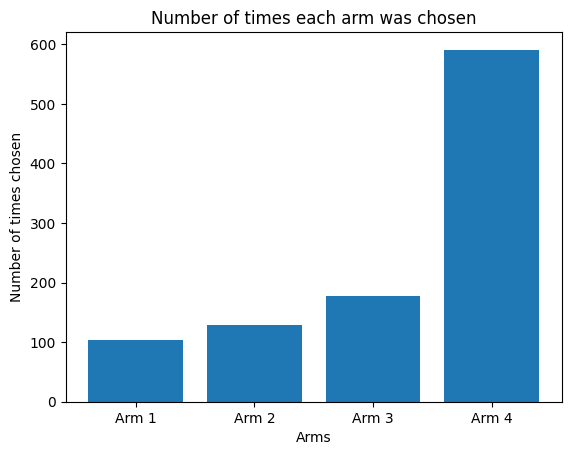

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

class Bandit:
    def __init__(self, probabilities):
        self.probabilities = probabilities
        self.n_arms = len(probabilities)
        self.counts = [0] * self.n_arms  # Count of times each arm was played
        self.values = [0.0] * self.n_arms  # Estimated value of each arm

    def choose_arm(self):
        """
        Select the arm using the Upper Confidence Bound (UCB1) algorithm.
        """
        total_counts = sum(self.counts)
        if 0 in self.counts:
            # If any arm hasn't been played yet, choose it
            return np.argmin(self.counts)

        ucb_values = [
            self.values[i] + np.sqrt(2 * np.log(total_counts) / self.counts[i])
            for i in range(self.n_arms)
        ]
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        """
        Update the counts and estimated values after playing an arm.
        """
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Update using the incremental formula to calculate the new average
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

def simulate_bandit_problem(probabilities, n_rounds):
    bandit = Bandit(probabilities)
    rewards = np.zeros(n_rounds)

    for i in range(n_rounds):
        chosen_arm = bandit.choose_arm()
        reward = np.random.rand() < probabilities[chosen_arm]  # Simulate Bernoulli reward
        bandit.update(chosen_arm, reward)
        rewards[i] = reward

    print(f"Total reward: {sum(rewards)}")
    print(f"Average reward: {np.mean(rewards)}")
    print(f"Number of times each arm was chosen: {bandit.counts}")

    # Plotting
    plt.bar(range(len(probabilities)), bandit.counts, tick_label=[f"Arm {i+1}" for i in range(len(probabilities))])
    plt.xlabel('Arms')
    plt.ylabel('Number of times chosen')
    plt.title('Number of times each arm was chosen')
    plt.show()

# Example: 4 arms with different probabilities of success
probabilities = [0.1, 0.15, 0.2, 0.25]  # Probability of winning for each arm
n_rounds = 1000  # Number of rounds to play

simulate_bandit_problem(probabilities, n_rounds)
